# Part I 

[Gas sensors for home activity monitoring Data Set](https://archive.ics.uci.edu/ml/datasets/Gas+sensors+for+home+activity+monitoring)


[KNN](https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/supervised_learning/k_nearest_neighbors.py)

[ML-From-Scratch Logistic Regression](https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/supervised_learning/logistic_regression.py)

[Numpy LR](https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f)

## Preprocessing

In [1]:
import numpy as np

In [380]:
metadata=np.loadtxt("./data/HT_Sensor_UCIsubmission/HT_Sensor_metadata.dat",skiprows=1,dtype=str)

In [3]:
metadata[metadata[:,2]=="background",2]=2
metadata[metadata[:,2]=="banana",2]=0
metadata[metadata[:,2]=="wine",2]=1

metadata=np.array(metadata[:,[0,2,3,4]],dtype=float)

In [4]:
dataset = np.loadtxt('./data/HT_Sensor_UCIsubmission/HT_Sensor_dataset.dat', skiprows=1)
datasetID=np.array(dataset[:,0],dtype=int)

In [5]:
# 仅仅挑选ID为banana与wine的
# 以及时间恰好有这两者存在的时间区间
selected = np.logical_and(metadata[datasetID,1]!=2,dataset[:,1]>0,dataset[:,1]<metadata[datasetID,3])
data=dataset[selected]
dataID=np.array(data[:,0],dtype=int)
data[:,0]=metadata[dataID,1]

#混淆in-place
np.random.shuffle(data)
#归一化
dataID=np.array(data[:,0],dtype=int)
data=(data-data.mean(axis=0))/data.std(axis=0)
data[:,0]=dataID
np.save("./data/HT_Sensor_UCIsubmission/data.npy",data)

## KNN

In [6]:
import numpy as np
from collections import Counter

In [207]:
data=np.load("./data/HT_Sensor_UCIsubmission/data.npy")
test_size=data.shape[0]//2
#分割train test 10%
X_test=data[:test_size,2:10]
y_test=data[:test_size,0].astype('int')

X_train=data[test_size:,2:10]
y_train=data[test_size:,0].astype('int')

print(X_test.shape,y_test.shape,X_train.shape,y_train.shape,data.shape)

(208227, 8) (208227,) (208228, 8) (208228,) (416455, 12)


In [151]:
class KNN():
    def __init__(self, k=5):
        self.k = k

    def predict(self, X_test, X_train, y_train):
        y_pred=np.empty(X_test.shape[0],dtype=int)
        for i,X in enumerate(X_test):
            if i%100 ==0:
                print(i)
            y_pred[i]=np.bincount(y_train[np.argsort(np.linalg.norm(X-X_train,axis=1))[:self.k]]).argmax()
        return y_pred

In [152]:
model=KNN(1)
y_pred=model.predict(X_test[:],X_train[:],y_train)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [155]:
result=Counter(np.equal(y_pred[:],y_test[:])).most_common()
result

[(True, 41638), (False, 7)]

```python
result=Counter(np.equal(y_pred[:],y_test[:])).most_common()
result
```
```python
[(True, 41638), (False, 7)]
```

## Logistic Regression

In [73]:
import numpy as np
from collections import Counter
import math

In [74]:
data=np.load("./data/HT_Sensor_UCIsubmission/data.npy")
test_size=data.shape[0]//10
#分割train test 10%
X_test=data[:test_size,2:10]
y_test=data[:test_size,0].astype('int')

X_train=data[test_size:,2:10]
y_train=data[test_size:,0].astype('int')

print(X_test.shape,y_test.shape,X_train.shape,y_train.shape,data.shape)

(41645, 8) (41645,) (374810, 8) (374810,) (416455, 12)


In [77]:
LOSS=[]
class LogisticRegression():
    def __init__(self,lr=0.1):
        self.lr=lr
        
    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))
    
    def loss(self,y,y_hat):
        return -np.mean(y * np.log(y_hat)+(1-y)*np.log(1-y_hat))
    
    def fit(self,X_train,y_train,epochs=5000):
        limit=1/math.sqrt(X_train.shape[1])
        self.W=np.random.uniform(-limit,limit,(X_train.shape[1],))
        
        for i in range(epochs):
            y_hat=self.sigmoid(X_train @ self.W)
            self.W -= self.lr * (X_train.T @ (y_hat - y_train) / y_train.shape[0])
            temp_loss=self.loss(y_train,y_hat)
            LOSS.append((i,temp_loss))
            if i %100 ==0:
                print(i,temp_loss)
                
    def predict(self,X_test):
        y_pred=self.sigmoid(X_test @ self.W)>0.5
        return y_pred.astype('int')

In [78]:
model=LogisticRegression(0.25)
model.fit(X_train,y_train,5000)
y_pred=model.predict(X_test)

0 0.6892937625690148
100 0.5705850194091441
200 0.568840731312909
300 0.5685419181145815
400 0.5684229031447733
500 0.5683513179944791
600 0.5683028854088324
700 0.5682690208158084
800 0.5682450245670334
900 0.568227890254225
1000 0.5682155928792081
1100 0.5682067354200419
1200 0.5682003395516986
1300 0.5681957129462307
1400 0.5681923619703815
1500 0.5681899327563505
1600 0.5681881706475592
1700 0.568186891878356
1800 0.5681859635797617
1900 0.5681852895494186
2000 0.5681848000645129
2100 0.5681844445581338
2200 0.5681841863382391
2300 0.5681839987712994
2400 0.5681838625201528
2500 0.5681837635426814
2600 0.5681836916406194
2700 0.568183639406697
2800 0.5681836014604813
2900 0.5681835738936037
3000 0.5681835538669194
3100 0.5681835393179492
3200 0.5681835287483935
3300 0.5681835210697914
3400 0.5681835154914094
3500 0.5681835114387987
3600 0.5681835084946353
3700 0.5681835063557417
3800 0.5681835048018641
3900 0.5681835036729925
4000 0.5681835028528821
4100 0.5681835022570824
4200 0.5

In [64]:
Counter(y_pred == y_test).most_common()

[(True, 28829), (False, 12816)]

In [1]:
28829/(28829+12816)

0.6922559731060152

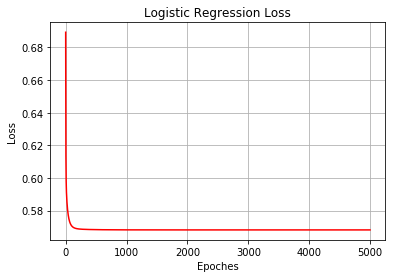

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.plot([i[0] for i in LOSS],[i[1] for i in LOSS],'r')
plt.title("Logistic Regression Loss")
plt.grid(True)
plt.ylabel("Loss")
plt.xlabel("Epoches")
plt.savefig("./graph/PartI-LR.png",dpi=1000)
plt.show()

# Part I-Again

## Preprocessing

[Electrical Grid Stability Simulated Data Data Set ](https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+)

In [154]:
import numpy as ny
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
data=np.loadtxt("./data/PartI/Data_for_UCI_named.csv",delimiter=",",skiprows=1,dtype=str)
#"tau1","tau2","tau3","tau4","p1","p2","p3","p4","g1","g2","g3","g4","stab","stabf"
#0       1      2       3     4    5    6    7    8     9   10   11   12     13

data=data[:,[0,1,2,3,5,6,7,8,9,10,11,12]].copy()
#"tau1","tau2","tau3","tau4","p2","p3","p4","g1","g2","g3","g4","stab",
#   0     1     2      3      4    5    6    7    8    9    10   11

In [133]:
#随机化
np.random.shuffle(data)
X=data[:,:11].copy().astype("float")
y=data[:,11].astype("float")>0
X=(X-X.mean(axis=0))/X.std(axis=0)

np.save("./data/PartI/X.npy",X)
np.save("./data/PartI/y.npy",y)

## KNN

In [137]:
X=np.load("./data/PartI/X.npy")
y=np.load("./data/PartI/y.npy")

test_size=X.shape[0]//10
#分割train test 10%
X_test=X[:test_size]
y_test=y[:test_size]

X_train=X[test_size:]
y_train=y[test_size:]

print(X_test.shape,y_test.shape,X_train.shape,y_train.shape)

(1000, 11) (1000,) (9000, 11) (9000,)


In [143]:
class KNN():
    def __init__(self, k=5):
        self.k = k

    def predict(self, X_test, X_train, y_train):
        y_pred=np.empty(X_test.shape[0],dtype=int)
        for i,X in enumerate(X_test):
            if i%100 ==0:
                print(i)
            y_pred[i]=np.bincount(y_train[np.argsort(np.linalg.norm(X-X_train,axis=1))[:self.k]]).argmax()
        return y_pred

In [147]:
model=KNN(3)
y_pred=model.predict(X_test[:],X_train[:],y_train)

0
100
200
300
400
500
600
700
800
900


In [148]:
result=Counter(np.equal(y_pred[:],y_test[:])).most_common()
result

[(True, 802), (False, 198)]

In [152]:
result=[]
for i in range(1,52,2):
    model=KNN(i)
    y_pred=model.predict(X_test[:],X_train[:],y_train)
    temp_result=Counter(np.equal(y_pred[:],y_test[:])).most_common()
    print(i,"\t",temp_result)
    result.append(temp_result)

0
100
200
300
400
500
600
700
800
900
1 	 [(True, 831), (False, 169)]
0
100
200
300
400
500
600
700
800
900
3 	 [(True, 856), (False, 144)]
0
100
200
300
400
500
600
700
800
900
5 	 [(True, 854), (False, 146)]
0
100
200
300
400
500
600
700
800
900
7 	 [(True, 861), (False, 139)]
0
100
200
300
400
500
600
700
800
900
9 	 [(True, 870), (False, 130)]
0
100
200
300
400
500
600
700
800
900
11 	 [(True, 868), (False, 132)]
0
100
200
300
400
500
600
700
800
900
13 	 [(True, 876), (False, 124)]
0
100
200
300
400
500
600
700
800
900
15 	 [(True, 878), (False, 122)]
0
100
200
300
400
500
600
700
800
900
17 	 [(True, 874), (False, 126)]
0
100
200
300
400
500
600
700
800
900
19 	 [(True, 880), (False, 120)]
0
100
200
300
400
500
600
700
800
900
21 	 [(True, 875), (False, 125)]
0
100
200
300
400
500
600
700
800
900
23 	 [(True, 876), (False, 124)]
0
100
200
300
400
500
600
700
800
900
25 	 [(True, 876), (False, 124)]
0
100
200
300
400
500
600
700
800
900
27 	 [(True, 876), (False, 124)]
0
100
200
3

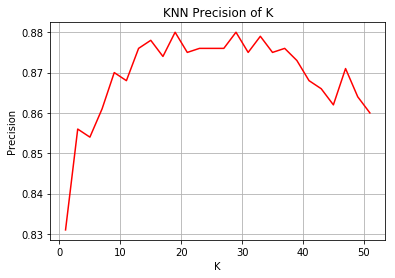

In [171]:
plt.figure(1)
plt.plot(range(1,52,2),[i[0][1]/1000 for i in result],'r')
#plt.plot(range(1,52,2),[i[1][1]for i in result],'g')
plt.title("KNN Precision of K")
plt.ylabel("Precision")
plt.xlabel("K")
plt.grid(True)
plt.savefig("./graph/PartI/KNN_Precision.png",dpi=1000)
plt.show()

## Logistic Regression

In [137]:
X=np.load("./data/PartI/X.npy")
y=np.load("./data/PartI/y.npy")

test_size=X.shape[0]//10
#分割train test 10%
X_test=X[:test_size]
y_test=y[:test_size]

X_train=X[test_size:]
y_train=y[test_size:]

print(X_test.shape,y_test.shape,X_train.shape,y_train.shape)

(1000, 11) (1000,) (9000, 11) (9000,)


In [167]:
LOSS=[]
class LogisticRegression():
    def __init__(self,lr=0.1):
        self.lr=lr
        
    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))
    
    def loss(self,y,y_hat):
        return -np.mean(y * np.log(y_hat)+(1-y)*np.log(1-y_hat))
    
    def fit(self,X_train,y_train,epochs=5000):
        limit=1/math.sqrt(X_train.shape[1])
        self.W=np.random.uniform(-limit,limit,(X_train.shape[1],))
        
        for i in range(epochs):
            y_hat=self.sigmoid(X_train @ self.W)
            self.W -= self.lr * (X_train.T @ (y_hat - y_train) / y_train.shape[0])
            temp_loss=self.loss(y_train,y_hat)
            LOSS.append((i,temp_loss))
            if i %100 ==0:
                print(i,temp_loss)
                
    def predict(self,X_test):
        y_pred=self.sigmoid(X_test @ self.W)>0.5
        return y_pred.astype('bool')

In [168]:
model=LogisticRegression(0.25)
model.fit(X_train,y_train,5000)
y_pred=model.predict(X_test)

0 0.7591379852744624
100 0.45900001355575204
200 0.4575137570672679
300 0.4574620064510612
400 0.45745987452653064
500 0.4574597839064089
600 0.457459780029938
700 0.4574597798638962
800 0.4574597798567822
900 0.45745977985647734
1000 0.4574597798564643
1100 0.4574597798564637
1200 0.4574597798564637
1300 0.4574597798564637
1400 0.4574597798564637
1500 0.4574597798564637
1600 0.4574597798564638
1700 0.4574597798564638
1800 0.4574597798564637
1900 0.4574597798564638
2000 0.4574597798564637
2100 0.4574597798564638
2200 0.4574597798564638
2300 0.4574597798564638
2400 0.4574597798564638
2500 0.4574597798564638
2600 0.4574597798564638
2700 0.4574597798564638
2800 0.4574597798564638
2900 0.4574597798564638
3000 0.4574597798564638
3100 0.4574597798564638
3200 0.4574597798564638
3300 0.4574597798564638
3400 0.4574597798564638
3500 0.4574597798564638
3600 0.4574597798564638
3700 0.4574597798564638
3800 0.4574597798564638
3900 0.4574597798564638
4000 0.4574597798564638
4100 0.4574597798564638
42

In [169]:
Counter(y_pred == y_test).most_common()

[(True, 762), (False, 238)]

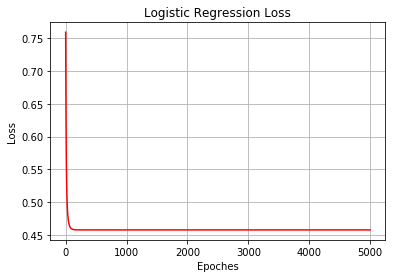

In [170]:
plt.figure(1)
plt.plot([i[0] for i in LOSS],[i[1] for i in LOSS],'r')
plt.title("Logistic Regression Loss")
plt.grid(True)
plt.ylabel("Loss")
plt.xlabel("Epoches")
plt.savefig("./graph/PartI/LR.png",dpi=1000)
plt.show()

# Part II-1

In [2]:
import numpy as np

In [3]:
ratings=np.loadtxt("./data/ml-1m/ratings.dat",delimiter="::",dtype=int)

In [4]:
user_num=6040
movie_num=3952
rating_matrix=np.zeros((6040+1,3952+1))
for r in ratings:
    rating_matrix[r[0],r[1]]=r[2] #rating_matrix[userID,movieID]

In [5]:
# 分割为train & test
train_matrix=rating_matrix.copy()
test_user_size=rating_matrix.shape[0]//10
test_movie_size=rating_matrix.shape[1]//10

train_matrix[:test_user_size,:test_movie_size]=0

test_matrix=rating_matrix[:test_user_size,:test_movie_size].copy()

print(train_matrix.shape,test_matrix.shape,rating_matrix.shape)

(6041, 3953) (604, 395) (6041, 3953)


## Content-Based

In [6]:
#需要用到上面的数据
user_profile=np.zeros((test_user_size,user_num+1))
for i in range(test_user_size):
    user_profile[i]=np.sum(train_matrix*train_matrix[i],axis=1)
    if i%100==0:
        print(i)

0
100
200
300
400
500
600


In [7]:
cb_pred=np.zeros((test_user_size,test_movie_size))
for i in range(1,test_user_size):
    for j in range(1,test_movie_size):
        norm=np.linalg.norm(train_matrix[:,j])*np.linalg.norm(user_profile[i])
        if norm == 0:
            cb_pred[i,j]=0
        else:
            cb_pred[i,j]=((train_matrix[:,j]@user_profile[i])/(norm))*5

In [149]:
#result_matrix=np.zeros((test_user_size,test_movie_size))
#result_matrix2=np.zeros((test_user_size,test_movie_size))
#for i in range(test_user_size):
#    for j in range(test_movie_size):
#        if test_matrix[i,j]!=0:
#            result_matrix[i,j]=cb_pred[i,j]-test_matrix[i,j]

result_matrix2=cb_pred.copy()
result_matrix2[test_matrix==0]=0
result_matrix=result_matrix2-test_matrix

$$
RMSE=\sqrt{\frac{1}{n}\sum_{j=1}^n (y_j-\bar{y}_j)^2}
$$

In [150]:
#RMSE
np.linalg.norm(result_matrix)/np.count_nonzero(test_matrix)

0.016676901400536383

$$
MAE=\frac{1}{n}\sum_{j=1}^n|y_j-\bar{y}_j|
$$

In [151]:
#MAE
np.sum(np.absolute(result_matrix))/np.count_nonzero(test_matrix)

1.4344089529739494

In [154]:
N=10 #TopN
recommend_rate=3
pred=np.argsort(result_matrix2,axis=1)[:,-N:]
#truth=np.argsort(test_matrix,axis=1)[:,-N:]

Total_Right=0
index=np.arange(test_movie_size)
for i in range(test_user_size):
    #Total_Right+=np.intersect1d(pred[i],truth[i]).shape[0]
    
    Total_Right+=np.intersect1d(pred[i],index[test_matrix[i]>recommend_rate]).shape[0]
    
precision=Total_Right/(N*test_user_size)
recall=Total_Right/test_matrix[test_matrix>recommend_rate].shape[0]

print(precision,recall)

0.4870860927152318 0.49628879892037786


In [155]:
def Pred_of_N(N):
    recommend_rate=3
    pred=np.argsort(result_matrix2,axis=1)[:,-N:]
    #truth=np.argsort(test_matrix,axis=1)[:,-N:]

    Total_Right=0
    index=np.arange(test_movie_size)
    for i in range(test_user_size):
        #Total_Right+=np.intersect1d(pred[i],truth[i]).shape[0]

        Total_Right+=np.intersect1d(pred[i],index[test_matrix[i]>recommend_rate]).shape[0]

    precision=Total_Right/(N*test_user_size)
    recall=Total_Right/test_matrix[test_matrix>recommend_rate].shape[0]
    
    return precision,recall

In [156]:
PR=[Pred_of_N(N) for N in range(1,50)]

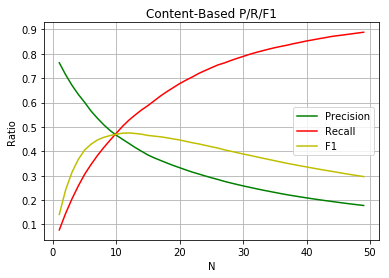

In [174]:
plt.figure(1)
plt.plot(range(1,50),[i[0] for i in PR],label="Precision",color="g")
plt.plot(range(1,50),[i[1] for i in PR],label="Recall",color="r")
plt.plot(range(1,50),[2*(i[0]*i[1])/(i[0]+i[1]) for i in PR],label="F1",color="y")
plt.title("Content-Based P/R/F1")
plt.xlabel("N")
plt.ylabel("Ratio")
plt.grid(True)
plt.legend()
plt.savefig("./graph/Content_based-PRF1_of_N.png")
plt.show()

## Collaborative Filtering

In [99]:
#需要用到上面的数据
print(train_matrix.shape,test_matrix.shape,rating_matrix.shape)

(6041, 3953) (604, 395) (6041, 3953)


In [104]:
movie_sim=np.zeros((movie_num+1,movie_num+1))
movie_bar=np.zeros(movie_num+1)

In [7]:
#无需重新运行
#item相似性 movie[i,j]表示电影i,j的相似性
for i in range(movie_num+1):
    ri=train_matrix[:,i]
    nonzero=np.count_nonzero(ri)
    if nonzero!=0:
        movie_bar[i]=ri.sum()/nonzero


for i in range(1,movie_num+1):
    print(i)
    for j in range(1,movie_num+1):
        if i>j:
            movie_sim[i,j]=movie_sim[j,i]
            continue
        ri=train_matrix[:,i]
        rj=train_matrix[:,j]
        
        rri=np.zeros(user_num+1)
        rrj=np.zeros(user_num+1)
        selected=np.logical_and(ri,rj)
        rri[selected]=ri[selected]-movie_bar[i]
        rrj[selected]=rj[selected]-movie_bar[j]
        
        norm=np.linalg.norm(rri)*np.linalg.norm(rrj)
        if norm==0:
            movie_sim[i,j]=0
        else:
            movie_sim[i,j]=(rri@rrj)/(norm)

np.save("./data/ml-1m/movie_sim.npy",movie_sim)

1
2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

In [105]:
movie_sim=np.load("./data/ml-1m/movie_sim.npy")
user_bar=np.zeros(user_num+1)
for i in range(user_num+1):
    ri=train_matrix[i]
    nonzero=np.count_nonzero(ri)
    if nonzero!=0:
        user_bar[i]=ri.sum()/nonzero

In [106]:
miu=train_matrix.sum()/np.count_nonzero(train_matrix)
bxi=user_bar.reshape(user_num+1,1)+movie_bar-miu

In [108]:
k=5
cf_pred=np.zeros((test_user_size,test_movie_size))

for x in range(1,test_user_size):
    if x%100==0:
        print(x)
    for i in range(1,test_movie_size):
        index=np.arange(movie_num+1)[train_matrix[x].astype("bool")]
        Nix=index[np.argsort(movie_sim[i,train_matrix[x].astype("bool")])[-k:]]
        
        sumij=movie_sim[i,Nix].sum()
        if sumij!=0:
            cf_pred[x,i]=bxi[x,i]+(movie_sim[i,Nix]@(train_matrix[x,Nix]-bxi[x,Nix]))/sumij

100
200
300
400
500
600


In [164]:
#result_matrix=np.zeros((test_user_size,test_movie_size))
#for i in range(test_user_size):
#    for j in range(test_movie_size):
#        if test_matrix[i,j]!=0:
#            result_matrix[i,j]=cf_pred[i,j]-test_matrix[i,j]
result_matrix2=cf_pred.copy()
result_matrix2[test_matrix==0]=0
result_matrix=result_matrix2-test_matrix

In [165]:
#RMSE
np.linalg.norm(result_matrix)/np.count_nonzero(test_matrix)

0.010776504401721263

In [166]:
#MAE
np.sum(np.absolute(result_matrix))/np.count_nonzero(test_matrix)

0.8694166710904666

In [167]:
N=10 #TopN
recommend_rate=3
pred=np.argsort(result_matrix2,axis=1)[:,-N:]
#truth=np.argsort(test_matrix,axis=1)[:,-N:]

Total_Right=0
index=np.arange(test_movie_size)
for i in range(test_user_size):
    #Total_Right+=np.intersect1d(pred[i],truth[i]).shape[0]
    
    Total_Right+=np.intersect1d(pred[i],index[test_matrix[i]>recommend_rate]).shape[0]
    
precision=Total_Right/(N*test_user_size)
recall=Total_Right/test_matrix[test_matrix>recommend_rate].shape[0]

print(precision,recall)

0.46589403973509935 0.47469635627530365


In [168]:
def Pred_of_N(N):
    recommend_rate=3
    pred=np.argsort(result_matrix2,axis=1)[:,-N:]
    #truth=np.argsort(test_matrix,axis=1)[:,-N:]

    Total_Right=0
    index=np.arange(test_movie_size)
    for i in range(test_user_size):
        #Total_Right+=np.intersect1d(pred[i],truth[i]).shape[0]

        Total_Right+=np.intersect1d(pred[i],index[test_matrix[i]>recommend_rate]).shape[0]

    precision=Total_Right/(N*test_user_size)
    recall=Total_Right/test_matrix[test_matrix>recommend_rate].shape[0]
    
    return precision,recall

In [169]:
PR=[Pred_of_N(N) for N in range(1,50)]

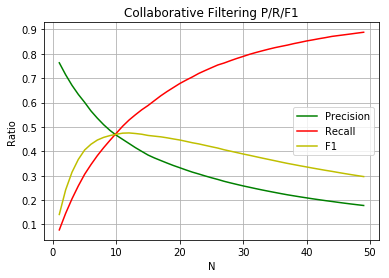

In [175]:
plt.figure(1)
plt.plot(range(1,50),[i[0] for i in PR],label="Precision",color="g")
plt.plot(range(1,50),[i[1] for i in PR],label="Recall",color="r")
plt.plot(range(1,50),[2*(i[0]*i[1])/(i[0]+i[1]) for i in PR],label="F1",color="y")
plt.title("Collaborative Filtering P/R/F1")
plt.xlabel("N")
plt.ylabel("Ratio")
plt.grid(True)
plt.legend()
plt.savefig("./graph/Collaborative_Filter-PRF1_of_N.png")
plt.show()

## Improved

基于Collaborative Filter

In [120]:
#需要用到最上面的数据
print(train_matrix.shape,test_matrix.shape,rating_matrix.shape)

(6041, 3953) (604, 395) (6041, 3953)


In [121]:
movies=np.zeros((movie_num+1,3),dtype="<100U")
with open("./data/ml-1m/movies.dat",encoding = "ISO-8859-1") as f:
    line=f.readline()
    while line:
        temp=line.strip().split("::")
        movies[int(temp[0]),:]=temp
        line=f.readline()

In [122]:
users=np.zeros((user_num+1,5),dtype="<20U")
with open("./data/ml-1m/users.dat",encoding = "ISO-8859-1") as f:
    line=f.readline()
    while line:
        temp=line.strip().split("::")
        users[int(temp[0]),:]=temp
        line=f.readline()

In [123]:
genre={"Action":0,
"Adventure":1,
"Animation":2,
"Children's":3,
"Comedy":4,
"Crime":5,
"Documentary":6,
"Drama":7,
"Fantasy":8,
"Film-Noir":9,
"Horror":10,
"Musical":11,
"Mystery":12,
"Romance":13,
"Sci-Fi":14,
"Thriller":15,
"War":16,
"Western":17
      }

movie_profile=np.zeros((movie_num+1,18))
for i in range(movie_num+1):
    temp=movies[i,2].split('|')
    for g in temp:
        if g in genre:
            movie_profile[i,genre[g]]=1

In [124]:
user_profile=np.zeros((test_user_size,18))
for i in range(test_user_size):
    user_profile[i]=np.sum(movie_profile.T*train_matrix[i],axis=1)

In [125]:
#逐渐变化alpha得到一个图
ex_pred=np.zeros((test_user_size,test_movie_size))
alpha=0.01
for x in range(1,test_user_size):
    if x%100 == 0:
        print(x)
    for i in range(1,test_movie_size):
        norm=np.linalg.norm(movie_profile[i])*np.linalg.norm(user_profile[x])
        if norm != 0:
            ex_pred[x,i]=0
            index=np.arange(movie_num+1)[train_matrix[x].astype("bool")]
            Nix=index[np.argsort(movie_sim[i,train_matrix[x].astype("bool")])[-k:]]
        
            sumij=movie_sim[i,Nix].sum()
            
            if sumij!=0:
                ex_pred[x,i]=bxi[x,i]+(1-alpha)*(movie_sim[i,Nix]@(train_matrix[x,Nix]-bxi[x,Nix]))/sumij+alpha*((movie_profile[i]@user_profile[x])/(norm))*5

100
200
300
400
500
600


In [137]:
#result_matrix=np.zeros((test_user_size,test_movie_size))
#for i in range(test_user_size):
#    for j in range(test_movie_size):
#        if test_matrix[i,j]!=0:
#            result_matrix[i,j]=ex_pred[i,j]-test_matrix[i,j]
result_matrix2=ex_pred.copy()
result_matrix2[test_matrix==0]=0
result_matrix=result_matrix2-test_matrix

In [138]:
np.linalg.norm(result_matrix)/np.count_nonzero(test_matrix) 

0.01077113454270768

In [139]:
np.sum(np.absolute(result_matrix))/np.count_nonzero(test_matrix)

0.8700781457473302

In [ ]:
# RMSE 0.010776504401721263
# MAE 0.8694166710904666
# P 0.46589403973509935 
# R 0.47469635627530365

In [140]:
N=10 #TopN
recommend_rate=3
pred=np.argsort(result_matrix2,axis=1)[:,-N:]
#truth=np.argsort(test_matrix,axis=1)[:,-N:]

Total_Right=0
index=np.arange(test_movie_size)
for i in range(test_user_size):
    #Total_Right+=np.intersect1d(pred[i],truth[i]).shape[0]
    
    Total_Right+=np.intersect1d(pred[i],index[test_matrix[i]>recommend_rate]).shape[0]
    
precision=Total_Right/(N*test_user_size)
recall=Total_Right/test_matrix[test_matrix>recommend_rate].shape[0]

print(precision,recall)

0.46589403973509935 0.47469635627530365


In [141]:
#逐渐变化alpha得到一个图
#alpha=0.01
k=5 #表示最邻近的k个点。由于是基于Collaborative Filter
def EX_PRED(alpha):
    print(alpha)
    ex_pred=np.zeros((test_user_size,test_movie_size))
    
    for x in range(1,test_user_size):
        #if x%100 == 0:
        #    print(x)
        for i in range(1,test_movie_size):
            norm=np.linalg.norm(movie_profile[i])*np.linalg.norm(user_profile[x])
            if norm != 0:
                ex_pred[x,i]=0
                index=np.arange(movie_num+1)[train_matrix[x].astype("bool")]
                Nix=index[np.argsort(movie_sim[i,train_matrix[x].astype("bool")])[-k:]]

                sumij=movie_sim[i,Nix].sum()

                if sumij!=0:
                    ex_pred[x,i]=bxi[x,i]+(1-alpha)*(movie_sim[i,Nix]@(train_matrix[x,Nix]-bxi[x,Nix]))/sumij+alpha*((movie_profile[i]@user_profile[x])/(norm))*5
            
        
    #result_matrix=np.zeros((test_user_size,test_movie_size))
    #for i in range(test_user_size):
    #    for j in range(test_movie_size):
    #        if test_matrix[i,j]!=0:
    #            result_matrix[i,j]=ex_pred[i,j]-test_matrix[i,j]
    result_matrix2=ex_pred.copy()
    result_matrix2[test_matrix==0]=0
    result_matrix=result_matrix2-test_matrix
    
    RMSR=np.linalg.norm(result_matrix)/np.count_nonzero(test_matrix) 
    MAE=np.sum(np.absolute(result_matrix))/np.count_nonzero(test_matrix)
    
    N=10 #TopN
    recommend_rate=3
    pred=np.argsort(result_matrix2,axis=1)[:,-N:]
    #truth=np.argsort(test_matrix,axis=1)[:,-N:]

    Total_Right=0
    index=np.arange(test_movie_size)
    for i in range(test_user_size):
        #Total_Right+=np.intersect1d(pred[i],truth[i]).shape[0]

        Total_Right+=np.intersect1d(pred[i],index[test_matrix[i]>recommend_rate]).shape[0]

    precision=Total_Right/(N*test_user_size)
    recall=Total_Right/test_matrix[test_matrix>recommend_rate].shape[0]

    print(RMSR,MAE,precision,recall)
    return RMSR,MAE,precision,recall

In [142]:
# RMSE 0.010776504401721263
# MAE 0.8694166710904666
# P 0.46589403973509935 
# R 0.47469635627530365
alpha=np.linspace(0,1,26)
result=[EX_PRED(a) for a in alpha]

0.0
0.010776504401721263 0.8694166710904666 0.46589403973509935 0.47469635627530365
0.04
0.010763338953771986 0.8725840254999963 0.4649006622516556 0.47368421052631576
0.08
0.010772366604916019 0.8766628910820653 0.4640728476821192 0.47284075573549256
0.12
0.010803531720279771 0.8820806097019214 0.4650662251655629 0.47385290148448045
0.16
0.010856643657914234 0.889127143990522 0.46572847682119206 0.474527665317139
0.2
0.010931382525656319 0.897864361957542 0.4632450331125828 0.47199730094466935
0.24
0.011027308595163925 0.9081958276263371 0.4629139072847682 0.4716599190283401
0.28
0.01114387474387544 0.9198594877502706 0.46274834437086093 0.47149122807017546
0.32
0.011280441138752085 0.9328568038885565 0.45927152317880793 0.46794871794871795
0.36
0.011436291303826287 0.9470172812163534 0.4586092715231788 0.4672739541160594
0.4
0.011610648724793633 0.9623287156682426 0.4566225165562914 0.46524966261808365
0.44
0.01180269322479357 0.9788478828248662 0.4543046357615894 0.46288798920377866

In [143]:
result2=[EX_PRED(a) for a in np.linspace(0,0.08,21)]

0.0
0.010776504401721263 0.8694166710904666 0.46589403973509935 0.47469635627530365
0.004
0.010774190411261023 0.8696631788944515 0.4653973509933775 0.4741902834008097
0.008
0.010772097794818556 0.8699352444712743 0.46605960264900664 0.4748650472334683
0.012
0.01077022668143039 0.8702261846011298 0.46556291390728477 0.47435897435897434
0.016
0.010768577186559514 0.8705335918153864 0.4653973509933775 0.4741902834008097
0.02
0.010767149412059791 0.8708527530012982 0.4644039735099338 0.4731781376518219
0.024
0.010765943446144587 0.8711825119169962 0.4649006622516556 0.47368421052631576
0.028
0.010764959363359536 0.8715228841678525 0.4650662251655629 0.47385290148448045
0.032
0.01076419722455954 0.8718690581286942 0.4652317880794702 0.4740215924426451
0.036000000000000004
0.010763657076889949 0.8722222576211545 0.46473509933774837 0.47351551956815113
0.04
0.010763338953771986 0.8725840254999963 0.4649006622516556 0.47368421052631576
0.044
0.010763242874892413 0.8729494426390071 0.464735099

In [144]:
result3=[EX_PRED(a) for a in np.linspace(0,0.04,21)]

0.0
0.010776504401721263 0.8694166710904666 0.46589403973509935 0.47469635627530365
0.002
0.010775319743332864 0.8695346328121657 0.4653973509933775 0.4741902834008097
0.004
0.010774190411261023 0.8696631788944515 0.4653973509933775 0.4741902834008097
0.006
0.010773116422905097 0.8697965742015386 0.46605960264900664 0.4748650472334683
0.008
0.010772097794818556 0.8699352444712743 0.46605960264900664 0.4748650472334683
0.01
0.01077113454270768 0.8700781457473302 0.46589403973509935 0.47469635627530365
0.012
0.01077022668143039 0.8702261846011298 0.46556291390728477 0.47435897435897434
0.014
0.010769374224995073 0.8703788892309455 0.46605960264900664 0.4748650472334683
0.016
0.010768577186559514 0.8705335918153864 0.4653973509933775 0.4741902834008097
0.018000000000000002
0.010767835578429884 0.8706913682845759 0.4652317880794702 0.4740215924426451
0.02
0.010767149412059791 0.8708527530012982 0.4644039735099338 0.4731781376518219
0.022
0.010766518698049392 0.8710159782155086 0.4645695364

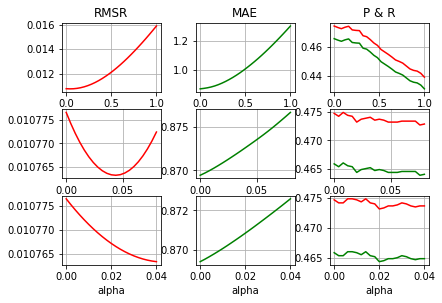

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.subplot(3,3,1)
plt.plot(np.linspace(0,1,26),[i[0] for i in result],label="RMSR",color='r')
plt.title('RMSR')
plt.grid(True)


plt.subplot(3,3,2)
plt.plot(np.linspace(0,1,26),[i[1] for i in result],label="MAE",color='g')
plt.title('MAE')
plt.grid(True)

plt.subplot(3,3,3)
plt.plot(np.linspace(0,1,26),[i[2] for i in result],label="P",color='g')
plt.plot(np.linspace(0,1,26),[i[3] for i in result],label="R",color='r')
plt.title('P & R')
plt.grid(True)


plt.subplot(3,3,4)
plt.plot(np.linspace(0,0.08,21),[i[0] for i in result2],label="RMSR",color='r')
plt.grid(True)

plt.subplot(3,3,5)
plt.plot(np.linspace(0,0.08,21),[i[1] for i in result2],label="MAE",color='g')
plt.grid(True)

plt.subplot(3,3,6)
plt.plot(np.linspace(0,0.08,21),[i[2] for i in result2],label="P",color='g')
plt.plot(np.linspace(0,0.08,21),[i[3] for i in result2],label="R",color='r')
#plt.title('P & R')
plt.grid(True)

plt.subplot(3,3,7)
plt.plot(np.linspace(0,0.04,21),[i[0] for i in result3],label="RMSR",color='r')
plt.grid(True)
plt.xlabel("alpha")

plt.subplot(3,3,8)
plt.plot(np.linspace(0,0.04,21),[i[1] for i in result3],label="MAE",color='g')
plt.grid(True)
plt.xlabel("alpha")

plt.subplot(3,3,9)
plt.plot(np.linspace(0,0.04,21),[i[2] for i in result3],label="P",color='g')
plt.plot(np.linspace(0,0.04,21),[i[3] for i in result3],label="R",color='r')
#plt.title('P & R')
plt.xlabel("alpha")
plt.grid(True)


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.savefig("./graph/PartII-1-Extension.png",dpi=1000)
plt.show()

## Extension

[推荐系统之矩阵分解及其Python代码实现](https://www.cnblogs.com/shenxiaolin/p/8637794.html)

In [178]:
#需要用到最上面的数据
print(train_matrix.shape,test_matrix.shape,rating_matrix.shape,movie_profile.shape)

(6041, 3953) (604, 395) (6041, 3953) (3953, 18)


In [188]:
def matrix_factorization(R,P,Q,K,steps=5000,alpha=0.0002,beta=0.02):
    Q=Q.T  # .T操作表示矩阵的转置
    result=[]
    for step in range(steps):
        print(step)
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j]>0:
                    eij=R[i][j]-np.dot(P[i,:],Q[:,j]) # .dot(P,Q) 表示矩阵内积
                    for k in range(K):
                        P[i][k]=P[i][k]+alpha*(2*eij*Q[k][j]-beta*P[i][k])
                        Q[k][j]=Q[k][j]+alpha*(2*eij*P[i][k]-beta*Q[k][j])
        eR=np.dot(P,Q)
        e=0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j]>0:
                    e=e+pow(R[i][j]-np.dot(P[i,:],Q[:,j]),2)
                    for k in range(K):
                        e=e+(beta/2)*(pow(P[i][k],2)+pow(Q[k][j],2))
        result.append(e)
        if e<0.001:
            break
    return P,Q.T,result

In [186]:
R=train_matrix.copy()
K=18 #设为电影的种类
P=np.random.rand(R.shape[0],K)
Q=np.random.rand(R.shape[1],K)

In [191]:
nP,nQ,result=matrix_factorization(R,P,Q,K,steps=40)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [200]:
np.save("./data/ml-1m/nP.npy",nP)
np.save("./data/ml-1m/nQ.npy",nQ)
np.save("./data/ml-1m/MF_Result.npy",result)

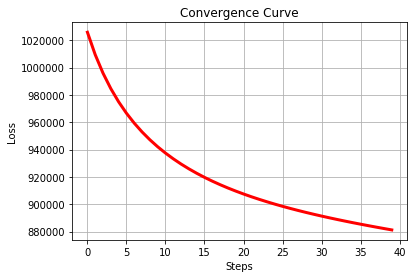

In [196]:
plt.plot(range(len(result)),result,color="r",linewidth=3)
plt.title("Convergence Curve")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.grid(True)
plt.savefig("./graph/Extended_Convergence_Curve.png",dpi=1000)
plt.show()

In [193]:
R_MF=np.dot(nP,nQ.T)

In [194]:
ext_pred=R_MF[:test_user_size,:test_movie_size]

In [195]:
# RMSE 0.010776504401721263
# MAE 0.8694166710904666
# P 0.46589403973509935 
# R 0.47469635627530365
result_matrix2=ext_pred.copy()
result_matrix2[test_matrix==0]=0
result_matrix=result_matrix2-test_matrix

RMSE=np.linalg.norm(result_matrix)/np.count_nonzero(test_matrix) 
MAE=np.sum(np.absolute(result_matrix))/np.count_nonzero(test_matrix)

N=10 #TopN
recommend_rate=3
pred=np.argsort(result_matrix2,axis=1)[:,-N:]
#truth=np.argsort(test_matrix,axis=1)[:,-N:]

Total_Right=0
index=np.arange(test_movie_size)
for i in range(test_user_size):
    #Total_Right+=np.intersect1d(pred[i],truth[i]).shape[0]
    
    Total_Right+=np.intersect1d(pred[i],index[test_matrix[i]>recommend_rate]).shape[0]
    
precision=Total_Right/(N*test_user_size)
recall=Total_Right/test_matrix[test_matrix>recommend_rate].shape[0]

print(RMSE,MAE,precision,recall)

0.009260923901617401 0.7447313937537074 0.4995033112582781 0.5089406207827261


In [201]:
(0.4995033112582781 -0.46589403973509935)/0.46589403973509935

0.07213930348258699

In [202]:
(0.5089406207827261-0.47469635627530365)/0.47469635627530365

0.07213930348258707

# Part II-2

In [203]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

## Graph Visualization

[networkx](https://networkx.github.io/documentation/stable/tutorial.html)

[networkx 笔记](https://hui-liu.github.io/blog/networkx-%E7%AC%94%E8%AE%B0/)

In [204]:
f=open("./data/graph/Erdos1_modified")
line=f.readlines()

In [205]:
data=[]
temp=[]
count=0
for i in line:
    if i!='\n':
        s=i.strip("\t\n 1234567890*^:").lower()
        if s=="erdos, peter l.":
            count+=1
        else:
            temp.append(s)
    else:
        data.append(temp)
        temp=[]
data.append(temp)
print(count)

10


In [206]:
name2seq=dict()
count=0
max_co=0
for i in data:
    if len(i)>max_co:
        max_co=len(i)
    for j in i:
        if not j in name2seq:
            name2seq[j]=count
            count+=1
name_num=len(name2seq)
print(name_num,max_co)

11517 435


In [207]:
seq2name={}
for i in name2seq.items():
    seq2name[i[1]]=i[0]

In [208]:
graph=np.full((name_num,name_num),False)
for i in data:
    x=name2seq[i[0]]
    for j in i[1:]:
        y=name2seq[j]
        graph[x,y]=True
        graph[y,x]=True

In [209]:
size=3000
choice=np.random.choice(name_num,size,replace=False)
g1=graph[choice][:,choice]
choice=(g1.sum(axis=1)!=0)
choice
graph

array([[False,  True,  True, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

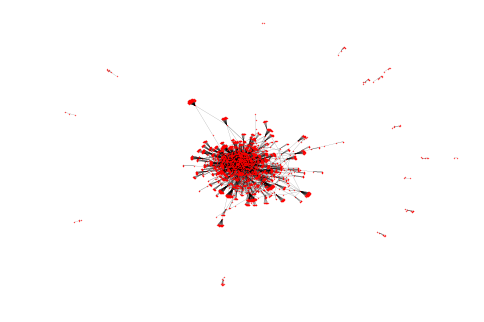

In [45]:
size=6000
choice=np.random.choice(name_num,size,replace=False)
g1=graph[choice][:,choice]
choice=(g1.sum(axis=1)!=0)
G=nx.Graph(g1[choice][:,choice])
%matplotlib inline
options = {
    'node_color': 'red',
    'node_size': 0.1,
    'line_color': 'grey',
    #'linewidths': 0,
    'width': 0.1,
}
nx.draw(G,**options)
#plt.figure(figsize=(30,70))
plt.savefig("./graph/node"+str(size)+".png",dpi=1000)
plt.show()

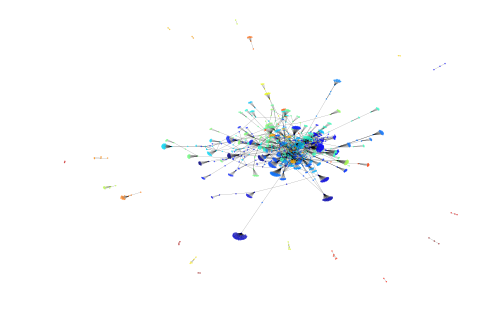

In [46]:
#!pip install python-louvain 
#思考是否可用动态的/ice and fire/knowledge graph
from community import community_louvain
size=4000
choice=np.random.choice(name_num,size,replace=False)
g1=graph[choice][:,choice]
choice=(g1.sum(axis=1)!=0)
G=nx.Graph(g1[choice][:,choice])
#G=nx.Graph(graph[:size,:size])
part =community_louvain.best_partition(G)
values = [part.get(node) for node in G.nodes()]

options = {
    'node_color': 'red',
    'node_size': 0.1,
    'line_color': 'grey',
    #'linewidths': 0,
    'width': 0.1,
    'cmap':plt.get_cmap('jet'),
    'node_color':values
}
nx.draw(G,**options)
#plt.figure(figsize=(30,70))
plt.savefig("./graph/node"+str(size)+"best_partition-random.png",dpi=1000)
plt.show()

## Influence

### Degree Centrality

In [7]:
degree=graph.sum(axis=0)
seq2name[degree.argmax()]

'alon, noga m.'

### Eigenvector Centrality

In [23]:
#无需重新运行
w2,v2=np.linalg.eigh(graph.astype("float"))

np.save("./data/graph/w2.npy",w2)
np.save("./data/graph/v2.npy",v2)

In [37]:
w2=np.load("./data/graph/w2.npy")
v2=np.load("./data/graph/v2.npy")
seq2name[v2[:,w2.argmax()].argmax()]

'alon, noga m.'

### Closeness Centrality

In [48]:
#无需重新运行
#近似算法，计算距离
#下面的D可以从内存取出，迭代
D=np.full((name_num,name_num),name_num)
D[graph]=1
index=np.arange(name_num)
for k in range(10):
    print("====== ",k," ======")
    for i in range(n):
        if i%1000==0:
            print(i)
        nextP=index[D[i]!=name_num]
        for j in range(n):
            for p in nextP:
                D[i,j]=min(D[i,j],D[i,p]+D[p,j])
np.save("./data/graph/D.npy",D)

======  0  ======
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
======  1  ======
0


KeyboardInterrupt: 

In [51]:
Distance=np.load("./data/graph/D.npy")
D_avg=(name_num-1)/(Distance.sum(axis=1))

In [52]:
seq2name[D_avg.argmax()]

'alon, noga m.'

## Community

[KMeans](https://gist.github.com/bistaumanga/6023692)

[KMeans Reinforce](https://gist.github.com/tvwerkhoven/4fdc9baad760240741a09292901d3abd)

In [210]:
import numpy as np

def kMeans(X, K, maxIters = 10, plot_progress = None):
    
    centroids = X[np.random.choice(np.arange(len(X)), K)]
    for i in range(maxIters):
        if i%100==0:
            print("Iter: ",i)
        # Cluster Assignment step
        C = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in centroids]) for x_i in X])
        # Ensure we have K clusters, otherwise reset centroids and start over
        # If there are fewer than K clusters, outcome will be nan.
        if (len(np.unique(C)) < K):
            print("Reset")
            centroids = X[np.random.choice(np.arange(len(X)), K)]
        else:
            # Move centroids step 
            centroids = [X[C == k].mean(axis = 0) for k in range(K)]
        if plot_progress != None: plot_progress(X, C, np.array(centroids))
    return np.array(centroids) , C

In [211]:
D1=graph.sum(axis=0).astype("float")
D1[D1==0]=0.1
D=np.diag(D1)
W=graph.copy().astype("float")

### Ratio Cut

$D-W$选择最小的k个特征向量$n\times k$ 

In [11]:
#无需重新运行
w_r,v_r=np.linalg.eigh(D-W)
np.save("./data/graph/w_r.npy",w_r)
np.save("./data/graph/v_r.npy",v_r)

In [212]:
w_r=np.load("./data/graph/w_r.npy")
v_r=np.load("./data/graph/v_r.npy")

In [213]:
#无需重跑
K=50 #K Clusters
k=100 #n*k
Miter=1000
centroids_r,C_r=kMeans(v_r[:,np.argsort(w_r)[:k]], K, maxIters = Miter, plot_progress = None)
np.save("./data/graph/C_r-50.npy",C_r)

Iter:  0
Iter:  100
Iter:  200
Iter:  300
Iter:  400
Iter:  500
Iter:  600
Iter:  700
Iter:  800
Iter:  900


In [215]:
C_r=np.load("./data/graph/C_r-50.npy")
Counter(C_r).most_common()

[(29, 4350),
 (49, 1556),
 (18, 833),
 (25, 424),
 (19, 387),
 (20, 327),
 (11, 242),
 (28, 220),
 (40, 213),
 (32, 174),
 (2, 159),
 (1, 155),
 (34, 148),
 (31, 133),
 (48, 126),
 (10, 125),
 (33, 119),
 (7, 116),
 (43, 107),
 (22, 107),
 (39, 106),
 (5, 104),
 (35, 97),
 (27, 94),
 (15, 90),
 (9, 87),
 (47, 77),
 (23, 70),
 (12, 69),
 (24, 67),
 (13, 66),
 (4, 58),
 (44, 52),
 (42, 45),
 (17, 45),
 (8, 42),
 (38, 42),
 (21, 40),
 (45, 38),
 (0, 30),
 (16, 30),
 (46, 26),
 (3, 23),
 (14, 22),
 (30, 18),
 (37, 16),
 (36, 13),
 (26, 12),
 (6, 9),
 (41, 8)]

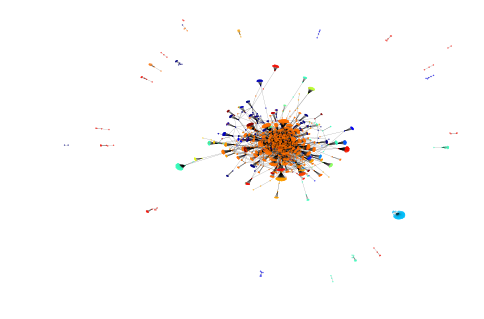

In [58]:
size=6000
choice=np.random.choice(name_num,size,replace=False)
g1=graph[choice][:,choice]
choice1=(g1.sum(axis=1)!=0)
G=nx.Graph(g1[choice1][:,choice1])
#G=nx.Graph(graph[:size,:size])
values=C_r[choice[choice1]]

options = {
    'node_color': 'red',
    'node_size': 0.1,
    'line_color': 'grey',
    #'linewidths': 0,
    'width': 0.1,
    'cmap':plt.get_cmap('jet'),
    'node_color':values
}
nx.draw(G,**options)
#plt.figure(figsize=(30,70))
plt.savefig("./graph/ratioCut"+str(size)+"-random.png",dpi=1000)
plt.show()

### Normalized Cut

$D^{-\frac{1}{2}}(D-W)D^{-\frac{1}{2}}$选择最小的k个特征向量$n\times k$

In [13]:
#无需重新运行
w_n,v_n=np.linalg.eigh((np.diag(D1**(-1/2)))@(D-W)@(np.diag(D1**(-1/2))))
np.save("./data/graph/w_n.npy",w_n)
np.save("./data/graph/v_n.npy",v_n)

In [59]:
w_n=np.load("./data/graph/w_n.npy")
v_n=np.load("./data/graph/v_n.npy")

In [60]:
#无需重跑
K=20 #K Clusters
k=100 #n*k
Miter=1000
centroids_n,C_n=kMeans(v_n[:,np.argsort(w_n)[:k]], K, maxIters = Miter, plot_progress = None)
np.save("./data/graph/C_n.npy",C_n)

Iter:  0
Iter:  100
Iter:  200
Iter:  300
Iter:  400
Iter:  500
Iter:  600
Iter:  700
Iter:  800
Iter:  900


In [216]:
C_n=np.load("./data/graph/C_n.npy")
Counter(C_n).most_common()

[(5, 7447),
 (14, 717),
 (12, 528),
 (17, 480),
 (13, 423),
 (18, 378),
 (2, 309),
 (3, 202),
 (19, 160),
 (0, 133),
 (6, 118),
 (4, 117),
 (11, 94),
 (8, 92),
 (10, 88),
 (1, 87),
 (7, 82),
 (16, 29),
 (9, 20),
 (15, 13)]

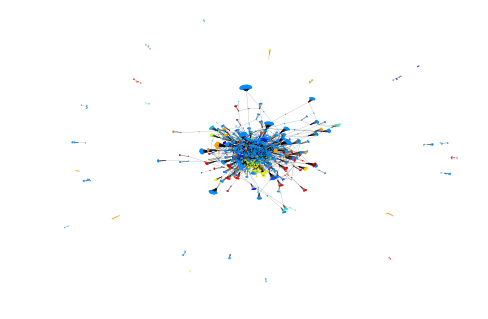

In [62]:
size=6000
choice=np.random.choice(name_num,size,replace=False)
g1=graph[choice][:,choice]
choice1=(g1.sum(axis=1)!=0)
G=nx.Graph(g1[choice1][:,choice1])
#G=nx.Graph(graph[:size,:size])
values=C_n[choice[choice1]]

options = {
    'node_color': 'red',
    'node_size': 0.1,
    'line_color': 'grey',
    #'linewidths': 0,
    'width': 0.1,
    'cmap':plt.get_cmap('jet'),
    'node_color':values,
    #'pos':nx.spectral_layout(G)
}
nx.draw(G,**options)
#plt.figure(figsize=(30,70))
plt.savefig("./graph/normalizedCut"+str(size)+"-random.png",dpi=1000)
plt.show()

### Modularity

$B=A-dd^\top /2m$ 选择最大的k个特征向量$n\times k$

In [15]:
#无需重新运行
w_m,v_m=np.linalg.eigh(W-D1.reshape(name_num,1)@D1.reshape(1,name_num)/W.sum())
np.save("./data/graph/w_m.npy",w_m)
np.save("./data/graph/v_m.npy",v_m)

In [63]:
w_m=np.load("./data/graph/w_m.npy")
v_m=np.load("./data/graph/v_m.npy")

In [64]:
#无需重跑
K=20 #K Clusters
k=100 #n*k
Miter=1000
centroids_m,C_m=kMeans(v_m[:,np.argsort(w_m)[-k:]], K, maxIters = Miter, plot_progress = None)
np.save("./data/graph/C_m.npy",C_m)

Iter:  0
Iter:  100
Iter:  200
Iter:  300
Iter:  400
Iter:  500
Iter:  600
Iter:  700
Iter:  800
Iter:  900


In [65]:
C_m=np.load("./data/graph/C_m.npy")
Counter(C_m).most_common()

[(8, 7255),
 (15, 776),
 (10, 522),
 (14, 476),
 (1, 364),
 (5, 353),
 (12, 235),
 (16, 221),
 (6, 193),
 (7, 180),
 (13, 166),
 (18, 130),
 (9, 109),
 (17, 100),
 (11, 95),
 (0, 92),
 (4, 90),
 (19, 82),
 (3, 67),
 (2, 11)]

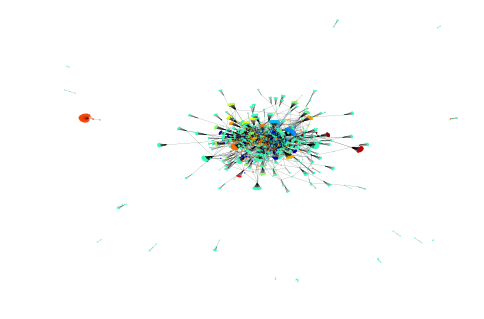

In [66]:
size=6000
choice=np.random.choice(name_num,size,replace=False)
g1=graph[choice][:,choice]
choice1=(g1.sum(axis=1)!=0)
G=nx.Graph(g1[choice1][:,choice1])
#G=nx.Graph(graph[:size,:size])
values=C_m[choice[choice1]]

options = {
    'node_color': 'red',
    'node_size': 0.1,
    'line_color': 'grey',
    #'linewidths': 0,
    'width': 0.1,
    'cmap':plt.get_cmap('jet'),
    'node_color':values
}
nx.draw(G,**options)
#plt.figure(figsize=(30,70))
plt.savefig("./graph/modularity"+str(size)+"-random.png",dpi=1000)
plt.show()